# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [1]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("Housing_Price.csv")
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour
0,1,60,8450,7,5,2003,2003,706,0,150,...,2,2008,208500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1,2,20,9600,6,8,1976,1976,978,0,284,...,5,2007,181500,Pave,Feedr,Norm,Y,Ex,Reg,Lvl
2,3,60,11250,7,5,2001,2002,486,0,434,...,9,2008,223500,Pave,Norm,Norm,Y,Ex,IR1,Lvl
3,4,70,9550,7,5,1915,1970,216,0,540,...,2,2006,140000,Pave,Norm,Norm,Y,Gd,IR1,Lvl
4,5,60,14260,8,5,2000,2000,655,0,490,...,12,2008,250000,Pave,Norm,Norm,Y,Ex,IR1,Lvl


which are categorical and which are numerical features?

In [2]:
# you can print and analyse the data type to say about categorical features
# categorical_features = ["MSSubClass", "OverallCond", "OverallQual", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold", "Condition1", "Condition2", 'CentralAir', 'HeatingQC',
#        'LotShape', 'LandContour']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='object']
numerical_features = [feature for feature in df.columns if feature not in categorical_features]

all_columns = list(df.columns)
feature_columns = [col for col in all_columns if col not in ['SalePrice', 'Id']]
df_features = df[feature_columns]

# Normalize the numerical features, uncomment this if you need normalization
# for col in feature_columns:
#     if col not in categorical_features:
#         col_mean = df_features[col].mean()
#         col_std = df_features[col].std()
#         col_data = np.array(df_features[col])
#         df_features[col] = df_features.apply(lambda x: (x[col] - col_mean)/col_std, axis=1)

In [3]:
print("These are the cateogorical features:")
print(*categorical_features, sep='\n')

These are the cateogorical features:
Street
Condition1
Condition2
CentralAir
HeatingQC
LotShape
LandContour


In [4]:
print("These are the numerical features:")
print(*numerical_features, sep=', ')

These are the numerical features:
Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice


Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [5]:
def onehot_encoding(df, columns):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    df_new = pd.get_dummies(df, columns=columns)
    return df_new

df_features = onehot_encoding(df_features, categorical_features)

In [6]:
df_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Po,HeatingQC_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,1,0,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,1,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1


Seperate the Label from the data, here it is 'SalePrice'

In [7]:
# Write your code here
X = np.array(df_features)
y = np.array(df['SalePrice']) # not normalizing the output, we take it from the original dataframe
feature_columns_new = list(df_features.columns)

In [8]:
# Visualize the changed dataframe
df_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Po,HeatingQC_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,1,0,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,1,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso regression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

In [10]:
# write your code here and plot lambda vs cross validation score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-1, 3, 100)
lasso_best_alpha = 0
prev_score = -1

avg_scores = []
for alpha in alphas:
    reg = Lasso(alpha=alpha)
    current_score = np.mean(cross_val_score(reg, X_train, y_train, cv=5))
    avg_scores.append(current_score)
    if current_score > prev_score:
        lasso_best_alpha = alpha
    prev_score = current_score

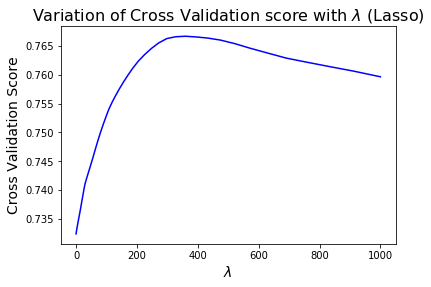

In [11]:
plt.plot(alphas, avg_scores, color='blue')
plt.title("Variation of Cross Validation score with $\lambda$ (Lasso)", size=16)
plt.xlabel("$\lambda$", size=14)
plt.ylabel("Cross Validation Score", size=14)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
print("Best value of lambda =", lasso_best_alpha)

lasso_reg = Lasso(alpha=lasso_best_alpha)
best_score_lasso = np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=5))
print("Best Cross Validation Score with Lasso Regularization =", best_score_lasso)

lasso_reg.fit(X_train, y_train)
y_train_pred = lasso_reg.predict(X_train)
lasso_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Square Error =", lasso_mse)

Best value of lambda = 359.3813663804629
Best Cross Validation Score with Lasso Regularization = 0.7667208672650392
Mean Square Error = 1129186785.9238474


## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


In [13]:
# write your code here and plot lambda vs cross validation score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-1, 2, 100)
ridge_best_alpha = 0
prev_score = -1

avg_scores_ridge = []
for alpha in alphas:
    reg2 = Ridge(alpha=alpha)
    current_score = np.mean(cross_val_score(reg2, X_train, y_train, cv=5))
    avg_scores_ridge.append(current_score)
    if current_score > prev_score:
        ridge_best_alpha = alpha
    prev_score = current_score

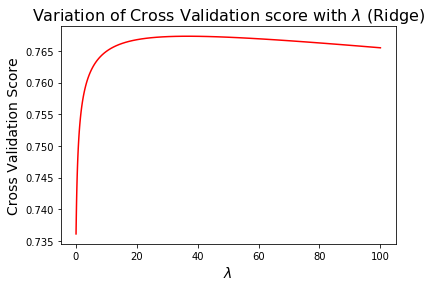

In [14]:
plt.plot(alphas, avg_scores_ridge, color='red')
plt.title("Variation of Cross Validation score with $\lambda$ (Ridge)", size=16)
plt.xlabel("$\lambda$", size=14)
plt.ylabel("Cross Validation Score", size=14)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
print("Best value of lambda =", ridge_best_alpha)

ridge_reg = Ridge(alpha=ridge_best_alpha)
best_score_ridge = np.mean(cross_val_score(ridge_reg, X_train, y_train, cv=5))
print("Best Cross Validation Score with Ridge Regularization =", best_score_ridge)

ridge_reg.fit(X_train, y_train)
y_train_pred = ridge_reg.predict(X_train)
ridge_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Square Error =", ridge_mse)

Best value of lambda = 37.64935806792467
Best Cross Validation Score with Ridge Regularization = 0.7673190888152448
Mean Square Error = 1103776870.9534123


Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [16]:
# write your code here print cross validation score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
linreg_score = np.mean(cross_val_score(linreg, X_train, y_train, cv=5))
print("Cross Validation score for Simple Linear Regression =", linreg_score)

linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
linear_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Square Error =",linear_mse)

Cross Validation score for Simple Linear Regression = 0.7319127091470848
Mean Square Error = 1046696125.7103921


Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


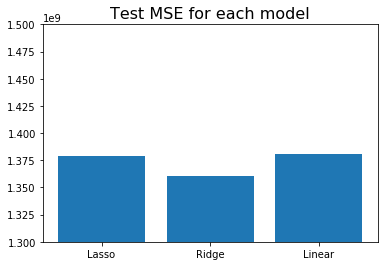

In [17]:
# predict on test data which you  splitted earlier, print coefficients of the learned model, Mean square error.
# Report the model which gives the least MSE. Also comment on important features
y_test_pred_lasso = lasso_reg.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)

y_test_pred_ridge = ridge_reg.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)

y_test_pred_linear = linreg.predict(X_test)
linear_test_mse = mean_squared_error(y_test, y_test_pred_linear)

plt.bar(x=["Lasso", "Ridge", "Linear"], height=[lasso_test_mse, ridge_test_mse, linear_test_mse])
plt.ylim([1.3e9, 1.5e9])
plt.title("Test MSE for each model", size=16)
plt.show()

In [18]:
print("Test MSE for Linear Regression =", linear_test_mse)
print("Test MSE for Ridge Regression =", ridge_test_mse)
print("Test MSE for Lasso Regression =", lasso_test_mse)

Test MSE for Linear Regression = 1380512172.4162946
Test MSE for Ridge Regression = 1360214643.7518353
Test MSE for Lasso Regression = 1379208206.3329403


Ridge regression has the best performance, with the lowest value of Mean Squared Error. The order of MSE is: Linear Regression > Lasso > Ridge.

Thus the performance order is:

Ridge regression > Lasso regression > Linear Regression

### Coefficients

In [19]:
coef_dict = {"Linear Regression": linreg.coef_, "Ridge Regression": ridge_reg.coef_, "Lasso Regression": lasso_reg.coef_}
df_coef = pd.DataFrame(coef_dict)
df_coef

,Linear Regression,Ridge Regression,Lasso Regression
0,-174.568153,-176.219642,-183.777177
1,0.462216,0.360275,0.395699
2,17594.616989,17540.037180,18500.951101
3,4491.264941,4233.372718,3432.178831
4,335.758423,328.783030,314.327053
5,138.787487,158.241795,173.956347
6,12.382085,11.249902,14.548230
7,-3.618867,-3.552983,0.000000
8,-1.353687,-1.039077,2.233262
9,7.409531,6.657842,1.700208


In [20]:
# Important features according to Lasso Regularization
print("Important features:")
for i, feature in enumerate(feature_columns_new):
    if lasso_reg.coef_[i]!=0:
        print(feature)

Important features:
MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Condition1_Norm
HeatingQC_Ex
LotShape_IR1
LotShape_IR2
LotShape_Reg
LandContour_Bnk
LandContour_HLS


1. As expected the coefficients obtained on using Ridge and Lasso Regularization are lower than for linear regression
2. Lasso Regression performs the task of feature selection, and it can be seen here as the coefficients of unimportant features have been forced to zero